In [3]:
from google.colab import files
uploaded = files.upload()

Saving Concrete_Data.csv to Concrete_Data.csv


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Concrete_Data.csv')

data.describe()


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.166408,73.894854,54.187379,181.564854,6.203204,972.918932,773.579515,45.662136,35.817961
std,104.507710,86.279340,63.995962,21.355663,5.973035,77.753954,80.175801,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.300000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
updated_col_names = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
                     'Coarse Aggregrate', 'Fine Aggregate', 'Age', 'Compressive Strength']

data.columns = updated_col_names

data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregrate,Fine Aggregate,Age,Compressive Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


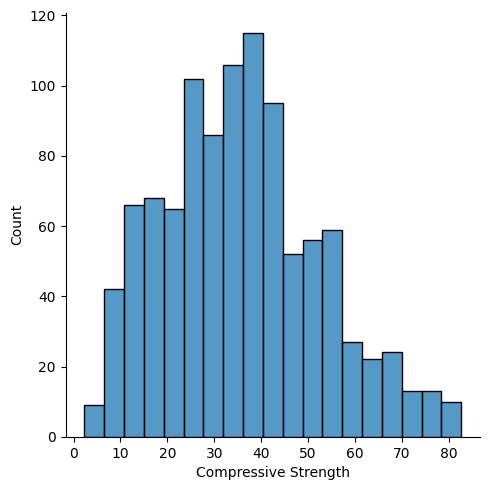

In [ ]:
import seaborn as sns
sns.displot(data['Compressive Strength'])

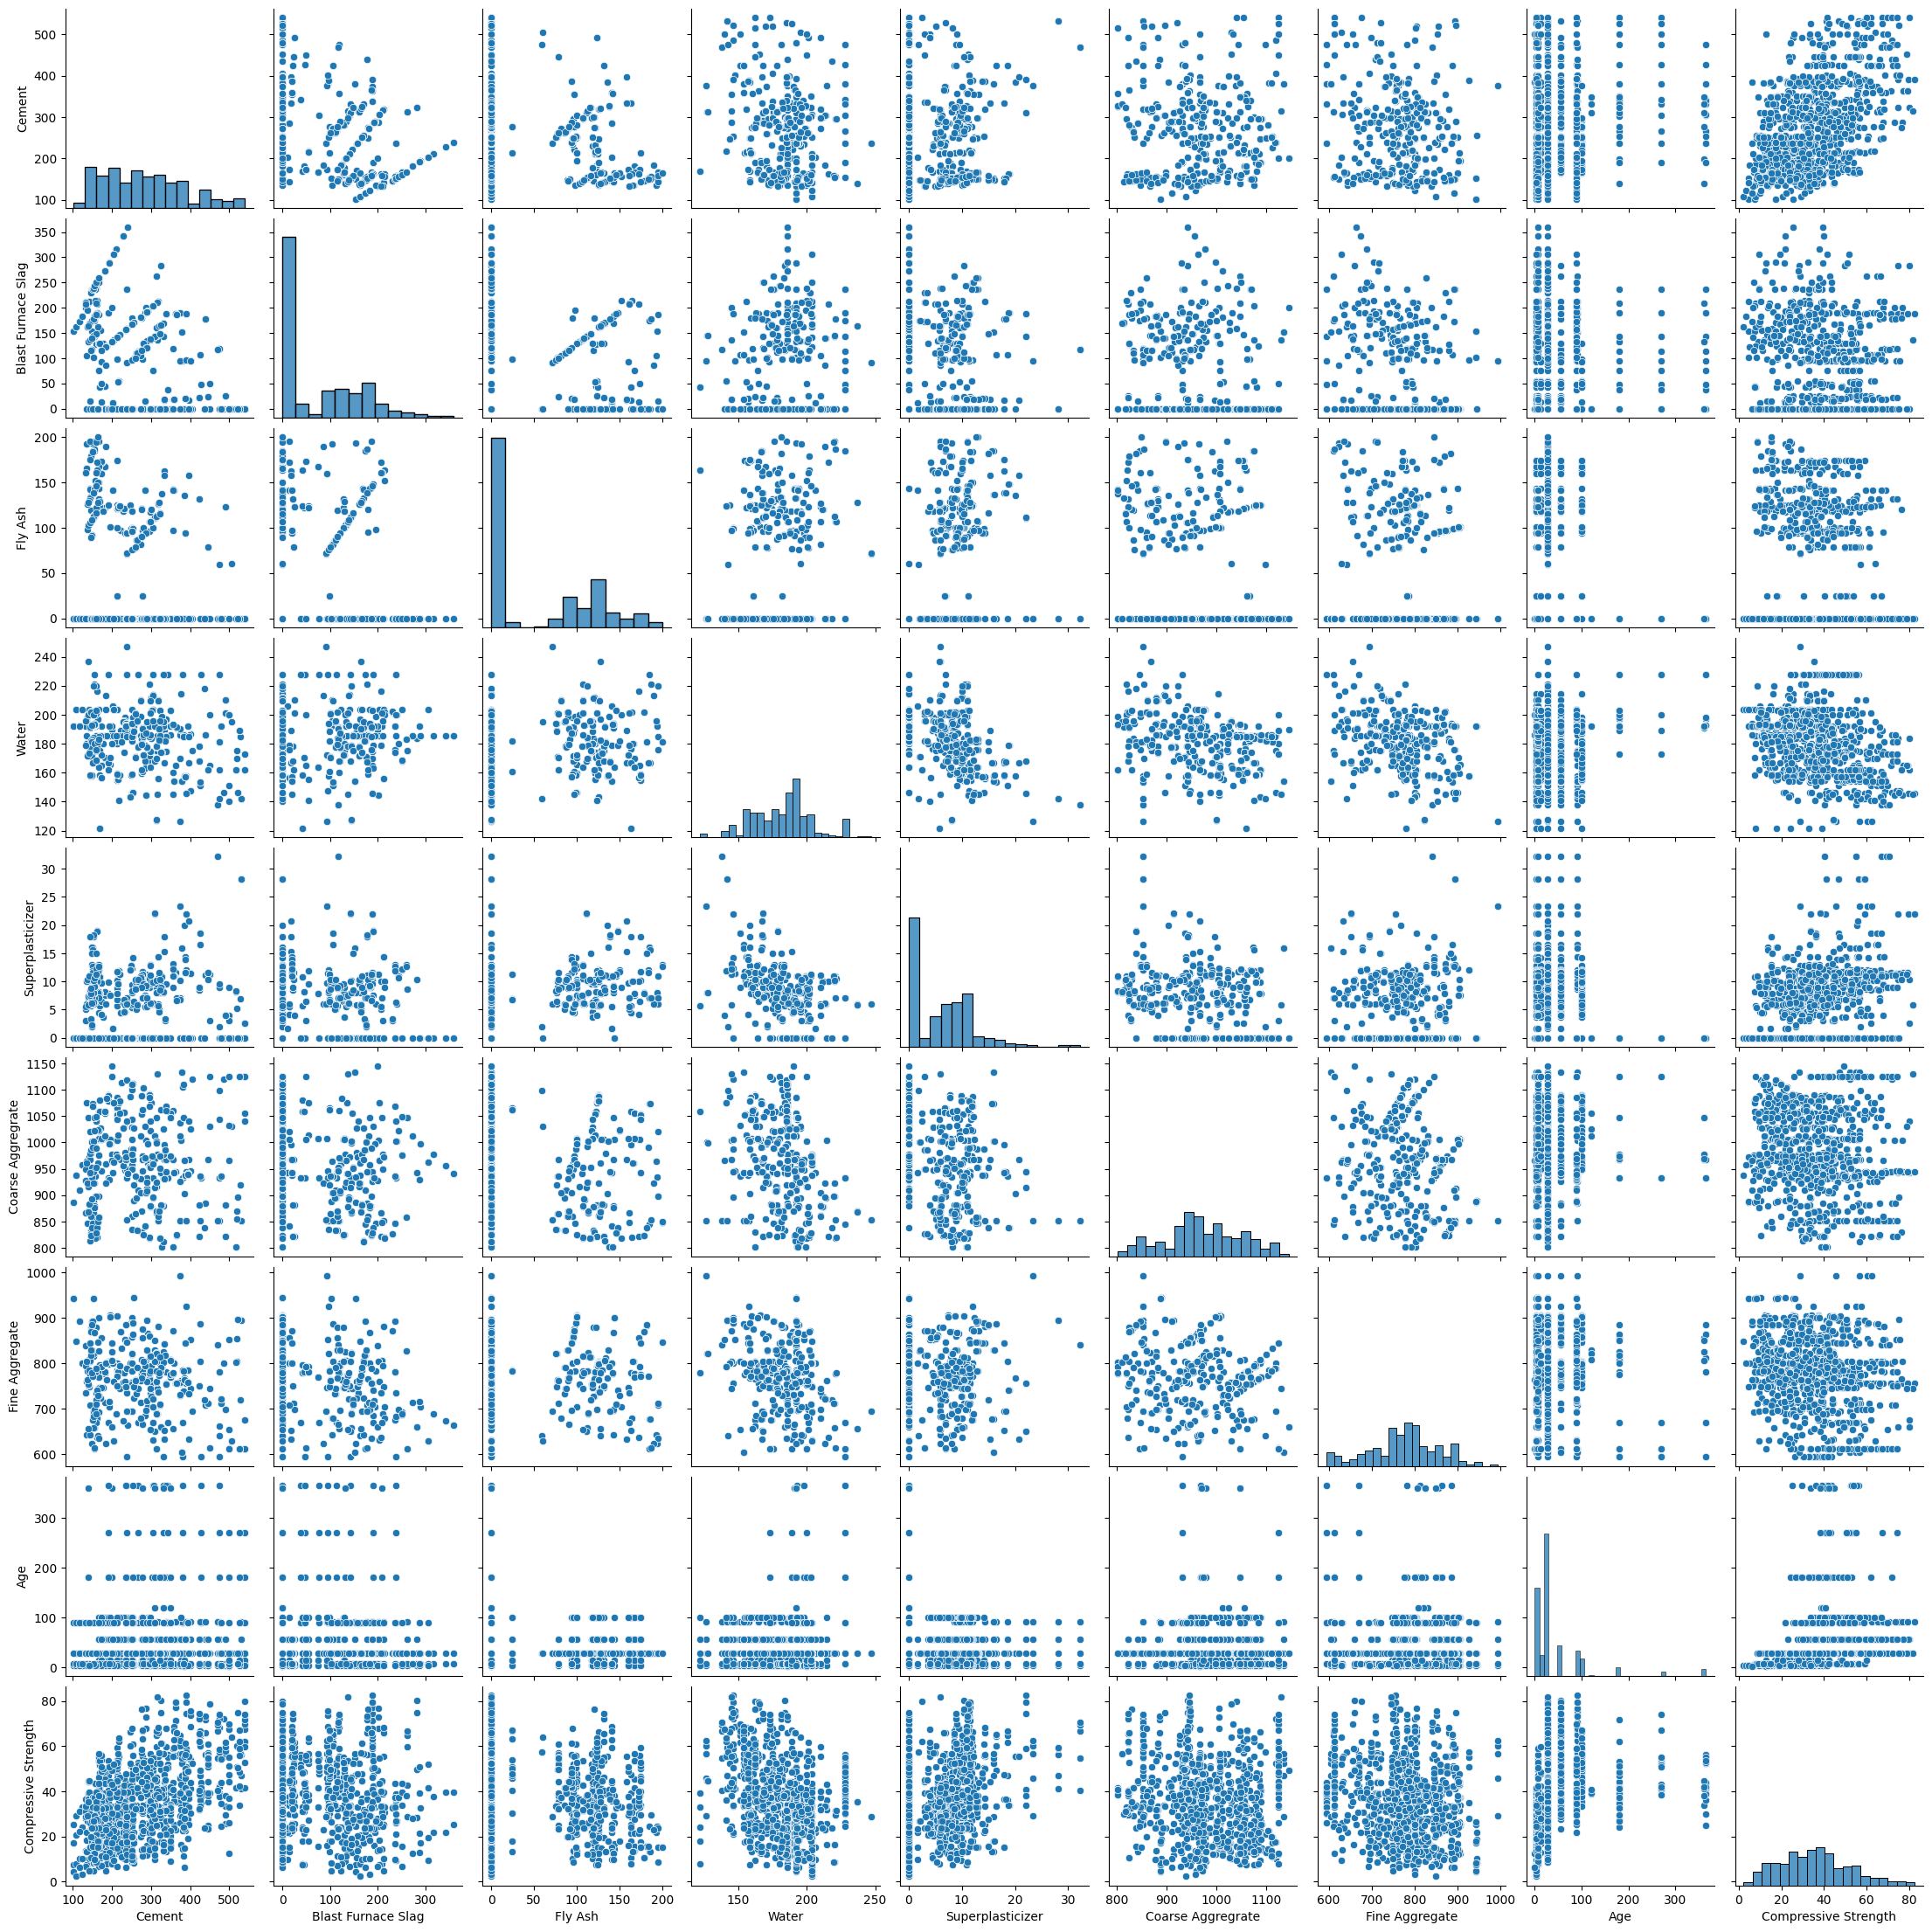

<Figure size 1000x800 with 0 Axes>

In [ ]:
sns.pairplot(data)
plt.show()

<Axes: >

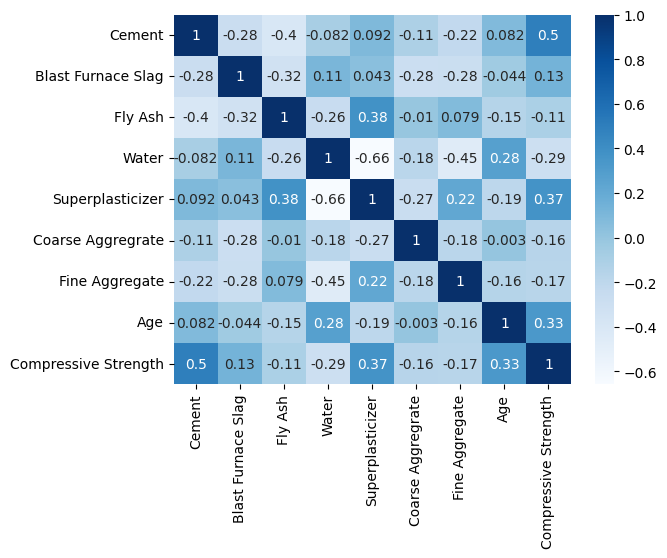

In [ ]:
corr = data.corr()
sns.heatmap(corr, cmap= 'Blues', annot = True)

Highest positive correlation between Compressive strength and Cement

<Axes: xlabel='Cement', ylabel='Compressive Strength'>

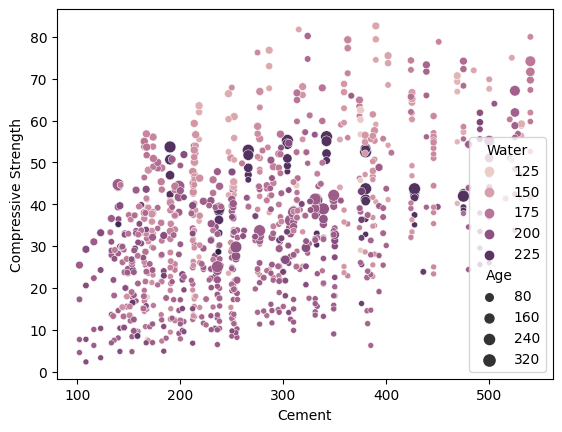

In [ ]:
sns.scatterplot(x= data['Cement'],y= data['Compressive Strength'], hue=data['Water'], size= data['Age'])


Compressive Strength correlates positively with Cement

Compressive Strength correlates positively with Age, though less than Cement

Older Cement tends to require more Water, as shown by the larger green data points

Compressive Strength correlates negatively with Water

High Compressive Strength with a low Age requires more Cement

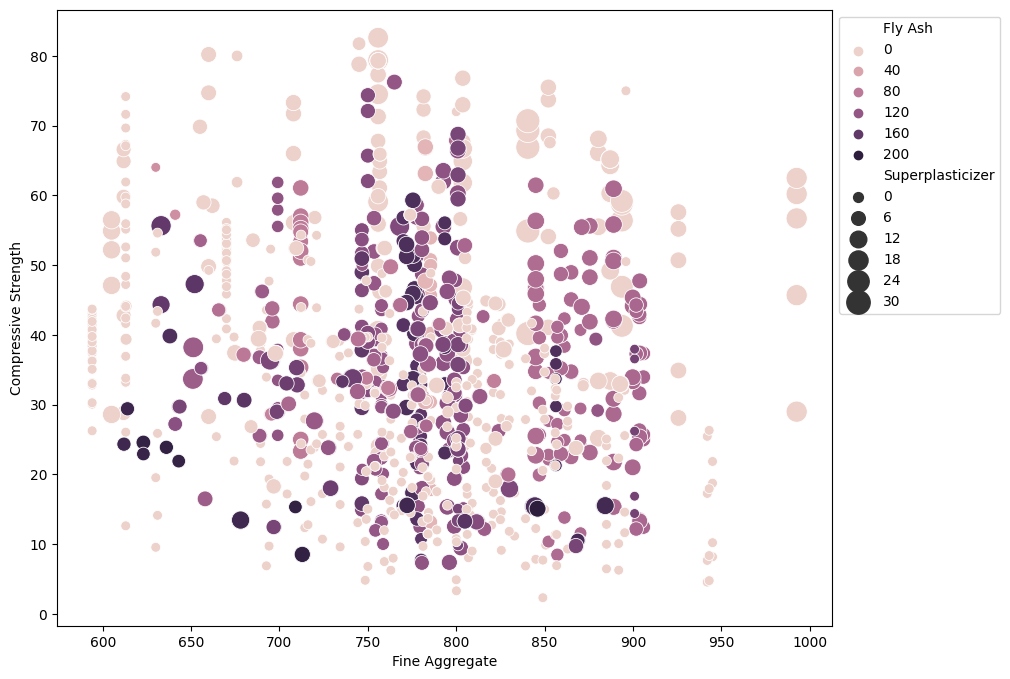

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x= data['Fine Aggregate'], y = data['Compressive Strength'], hue = data['Fly Ash'], size =data['Superplasticizer'], sizes=(50, 300))
ax.legend(loc="upper left", bbox_to_anchor=(1,1))

Training model on Multiple linear regression


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
# Splitting the features and target variable

cols = data.columns.drop('Compressive Strength')
X = data[cols]
y = data['Compressive Strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor= LinearRegression()
regressor.fit(X_train, y_train)
y_pred= regressor.predict(X_test)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)


0.6276054058746753


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

print(r2)

mean absolute error

In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

7.744851021432114


mean squared error


In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

95.95748249188652


training and test score

In [ ]:
print('Train Score: ', regressor.score(X_train, y_train))
print('Test Score: ', regressor.score(X_test, y_test))

Train Score:  0.6104964304702662
Test Score:  0.6276054058746753


DECISION TREES

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
model = DecisionTreeRegressor(random_state=1)

data = pd.read_csv('Concrete_Data.csv')
updated_col_names = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
                     'Coarse Aggregrate', 'Fine Aggregate', 'Age', 'Compressive Strength']

data.columns = updated_col_names
cols = data.columns.drop('Compressive Strength')
X = data[cols]
y = data['Compressive Strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit the model
model.fit(X_train, y_train)
predictions =model.predict(X_test)
print(mean_absolute_error(y_test, predictions))

4.3728155339805825


mean squared error

In [12]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, predictions))

43.306838834951456


In [18]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)

print(r2)

0.8319335579468105


training and test score

In [ ]:
print('Train Score: ', model.score(X_train, y_train))
print('Test Score: ', model.score(X_test , y_test))

Train Score:  0.9969388417779822
Test Score:  0.8319335579468105


Random forest



In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
compressive_preds = forest_model.predict(X_test)
print(mean_absolute_error(y_test, compressive_preds))
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, compressive_preds))

3.867066347665281
30.719342820243334


mean squared error= 30.79

training and test score

In [ ]:
print('Train Score: ', forest_model.score(X_train, y_train))
print('Test Score: ', forest_model.score(X_test , y_test))

Train Score:  0.9863395060505372
Test Score:  0.8807834792632405
